# 주성분 분석
- 서로 연관되어 있는 변수들이 관측되었을 때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은수의 새로운 변수를 생성하는 방법.
- 차원을 줄이는 방법으로 성능 향상과 컬럼들의 결합에 목적이 있음.

In [4]:
# 설문지를 이용한 주성분 분석

data = read.table("../Data/pasta.txt")
head(data)
tail(data)
str(data)

,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


,noodle,dishes,sauce
Vongole,3,5,5
Boscaiola,4,3,2
Ragu,4,4,3
Alfredo,1,2,1
Bechamel,3,3,2
Carbonara,5,5,3


'data.frame':	10 obs. of  3 variables:
 $ noodle: int  2 1 5 2 3 4 4 1 3 5
 $ dishes: int  4 5 3 2 5 3 4 2 3 5
 $ sauce : int  5 1 4 3 5 2 3 1 2 3


In [5]:
# 다중 공선성 확인 : 너무 상관이 높아서 마치 쌍둥이 같은 데이터 찾기
cor(data)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [9]:
# 표준화 : 평균을 0으로 , 표준편차는 1로 변경해서 데이터를 새롭게 구성 
data1 <- scale(data) # 파이썬에서 log함수를 사용

summary(data1)
summary(data)

apply(data1, 2, sd)
apply(data, 2, sd)

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

noodle dishes  sauce 
     1      1      1

noodle   dishes    sauce 
1.490712 1.173788 1.449138

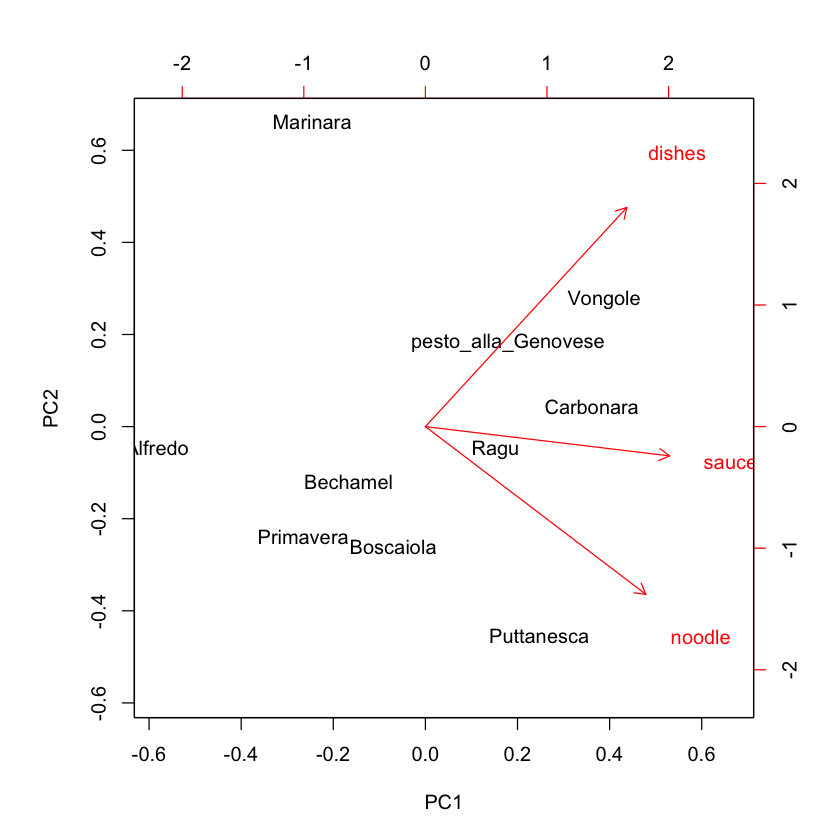

In [12]:
# 주성분 분석
p1 <- prcomp(data, scale =T)
par(bg='white')
biplot(p1)

라면 데이터셋

X,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4


,X,면발,포장재,국물
3,쌀사리곰탕면,3,4,3
4,무파마,3,3,5
5,안성탕면,1,2,3
6,오징어짬뽕,1,3,4
7,너구리,3,3,4
8,육계장,2,3,5


'data.frame':	8 obs. of  4 variables:
 $ X     : Factor w/ 8 levels "너구리","무파마",..: 3 8 4 2 5 6 1 7
 $ 면발  : int  2 5 3 3 1 1 3 2
 $ 포장재: int  4 2 4 3 2 3 3 3
 $ 국물  : int  5 1 3 5 3 4 4 5


,면발,포장재,국물
면발,1.0000000,-0.1443376,-0.5499719
포장재,-0.1443376,1.0000000,0.5443311
국물,-0.5499719,0.5443311,1.0000000


      면발             포장재             국물        
 Min.   :-1.1456   Min.   :-1.3229   Min.   :-1.9802  
 1st Qu.:-0.5728   1st Qu.:-0.3307   1st Qu.:-0.5401  
 Median : 0.0000   Median : 0.0000   Median : 0.1800  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3819   3rd Qu.: 0.3307   3rd Qu.: 0.9001  
 Max.   : 1.9094   Max.   : 1.3229   Max.   : 0.9001  

      면발          포장재          국물     
 Min.   :1.00   Min.   :2.00   Min.   :1.00  
 1st Qu.:1.75   1st Qu.:2.75   1st Qu.:3.00  
 Median :2.50   Median :3.00   Median :4.00  
 Mean   :2.50   Mean   :3.00   Mean   :3.75  
 3rd Qu.:3.00   3rd Qu.:3.25   3rd Qu.:5.00  
 Max.   :5.00   Max.   :4.00   Max.   :5.00  

면발 포장재   국물 
     1      1      1

면발    포장재      국물 
1.3093073 0.7559289 1.3887301

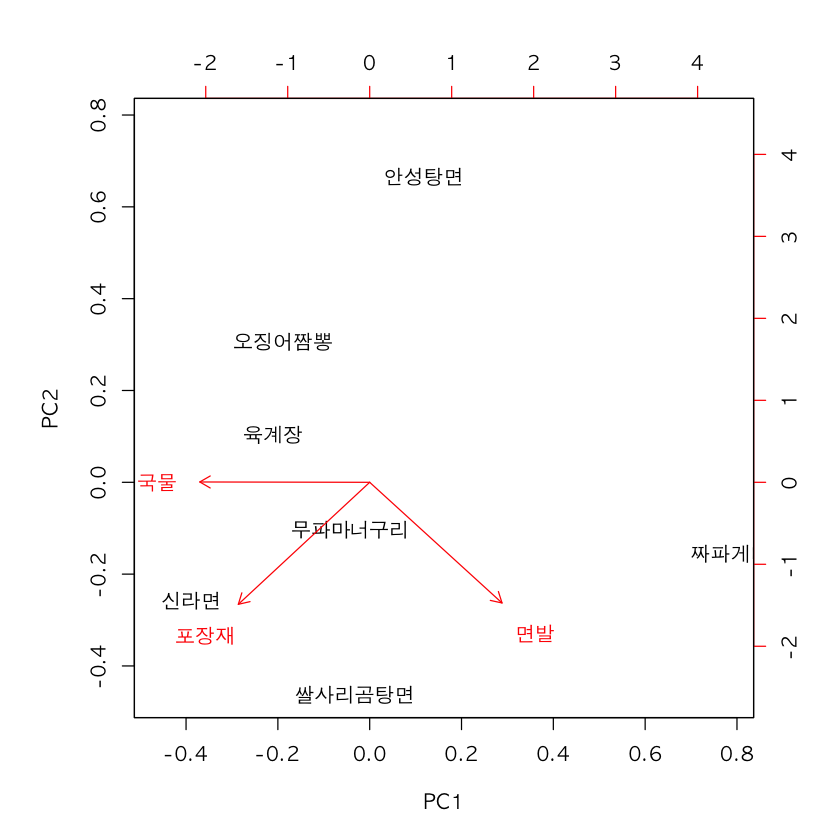

In [23]:
# 설문지를 이용한 주성분 분석

라면 = read.table("../Data/라면.txt" , header = T)
head(라면)
tail(라면)
str(라면)

rownames(라면) <- 라면$X
라면<- 라면[,-1]
# 다중 공선성 확인 : 너무 상관이 높아서 마치 쌍둥이 같은 데이터 찾기
cor(라면)

# 표준화 : 평균을 0으로 , 표준편차는 1로 변경해서 데이터를 새롭게 구성 
라면1 <- scale(라면) # 파이썬에서 log함수를 사용

summary(라면1)
summary(라면)

apply(라면1, 2, sd)
apply(라면, 2, sd)

# 주성분 분석
p1 <- prcomp(라면, scale =T)
options(warn= -1)
par(bg='white', family="AppleGothic")
biplot(p1)

---
# USArrests
- 1973년 미국 50개주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계 데이터 
- 또한 도시 지역에 살고 있는 인구의 비율도 주어진다.

- Murder : 살인
- Assault : 폭행
- UrbanPop : 도시인구밀도
- Rape : 강간

In [25]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


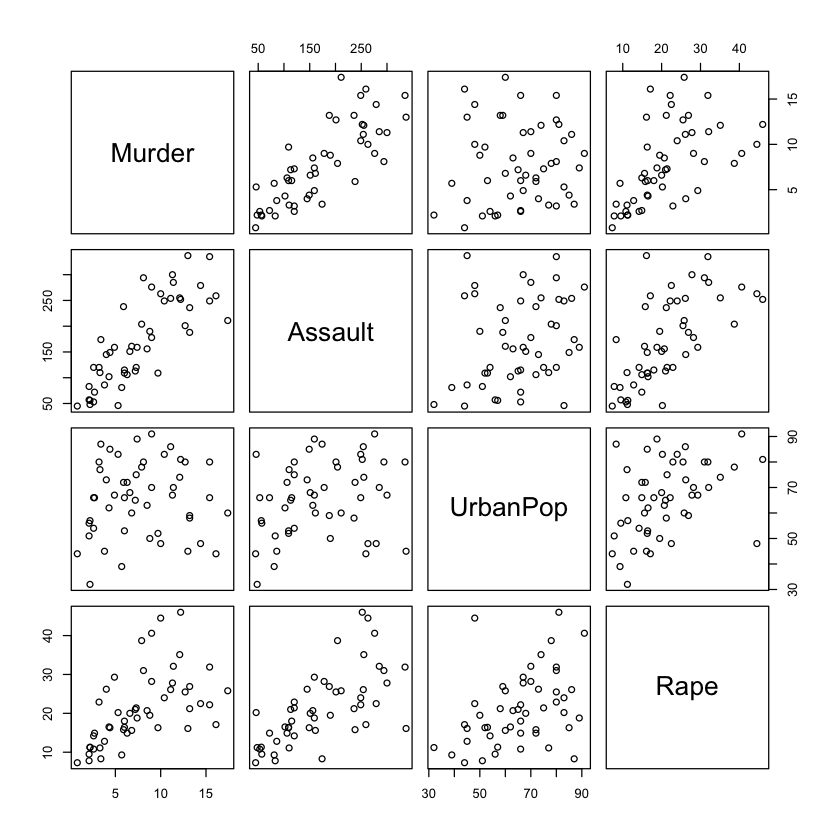

In [28]:
# 데이터 상관관계
cor(USArrests)
plot(USArrests)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

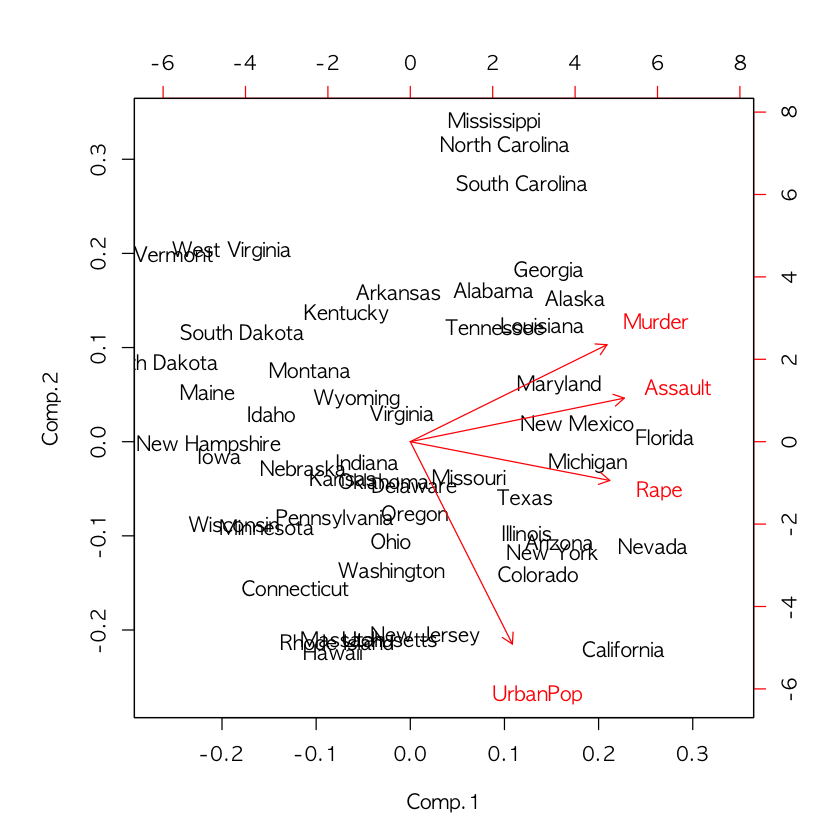

In [30]:
# 주성분 분석 대표가 되는 컬럼을 찾아 그걸로 주성분 분석할것임
result <- princomp(USArrests, cor =T)
summary(result) 
# comp1 까지 Cumulative Proportion  0.6200604 62퍼를 대변할수있다
# comp2 까지 더하면 Cumulative Proportion 0.8675017 86퍼를 대변할 수 있다. ... 

par(bg='white', family="AppleGothic")
biplot(result)

In [32]:
result$loadings
# 1 주성분 (comp1) = 0.536 * Murder + 0.583 * Assault + 0.278 * UrbanPop + ...


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [36]:
# 1 주성분으로 새로운 변수값 생성
score <- 0.536 * USArrests$Murder + 0.583 * USArrests$Assault + 0.278 * USArrests$UrbanPop + 0.543 * USArrests$Rape

# States와 주성분 값으로 데이터 프레임 생성
Result <- data.frame(States = rownames(USArrests), Score=score)
head(Result)

States,Score
Alabama,172.2988
Alaska,196.1965
Arizona,214.8166
Arkansas,139.9753
California,213.0758
Colorado,165.8645


In [37]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [39]:
# 우선순위 알아보기 
head( arrange(Result, desc(Score)) , 10)

States,Score
Florida,243.1211
North Carolina,224.6913
Arizona,214.8166
Maryland,214.6782
California,213.0758
New Mexico,209.1557
Nevada,200.9512
Alaska,196.1965
South Carolina,195.9369
Michigan,194.7819


> 끗